<a href="https://colab.research.google.com/github/kotsun32/Dog_vision_Deep_Learning/blob/main/Copy_of_Dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!unzip "/content/drive/MyDrive/DogVision/dog-breed-identification.zip"

Streaming output truncated to the last 5000 lines.
  inflating: dog-breed-identification/train/ce31f66a9991f1f2bb45b84b5a7bd6e7.jpg  
  inflating: __MACOSX/dog-breed-identification/train/._ce31f66a9991f1f2bb45b84b5a7bd6e7.jpg  
  inflating: dog-breed-identification/train/28f673b778e6f4cb974dc332fcb1ee1d.jpg  
  inflating: __MACOSX/dog-breed-identification/train/._28f673b778e6f4cb974dc332fcb1ee1d.jpg  
  inflating: dog-breed-identification/train/d25a5f80d6980ae97d2941913fc1ddd6.jpg  
  inflating: __MACOSX/dog-breed-identification/train/._d25a5f80d6980ae97d2941913fc1ddd6.jpg  
  inflating: dog-breed-identification/train/82d8cd7ee08ea0d65a6ee61da1520a73.jpg  
  inflating: __MACOSX/dog-breed-identification/train/._82d8cd7ee08ea0d65a6ee61da1520a73.jpg  
  inflating: dog-breed-identification/train/55132cf806d48347350caa4a31f0126b.jpg  
  inflating: __MACOSX/dog-breed-identification/train/._55132cf806d48347350caa4a31f0126b.jpg  
  inflating: dog-breed-identification/train/ac8869ca8acc2334a3e0

# New Section

# New Section

# New Section

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub 

In [ ]:
print("GPU", "available(YESSS!)" if tf.config.list_physical_devices("GPU") else "Not available")

GPU available(YESSS!)


In [ ]:
labels_csv = pd.read_csv("/content/drive/MyDrive/DogVision/dog-breed-identification/labels.csv")
print(labels_csv.head())

                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
print(labels_csv.describe())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


In [ ]:
labels_csv.breed.value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

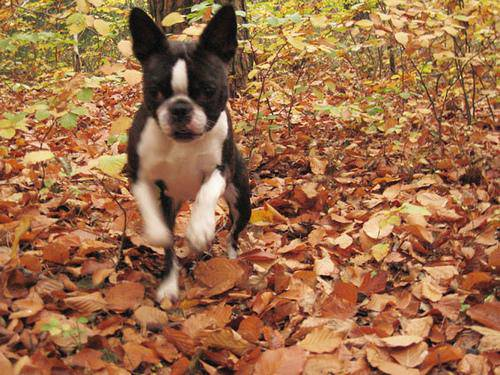

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/DogVision/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [ ]:
filenames = ["/content/drive/MyDrive/DogVision/dog-breed-identification/train/" + fname + ".jpg" for fname in labels_csv['id']]

In [ ]:
filenames[:5]

['/content/drive/MyDrive/DogVision/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/DogVision/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/DogVision/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/DogVision/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/DogVision/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

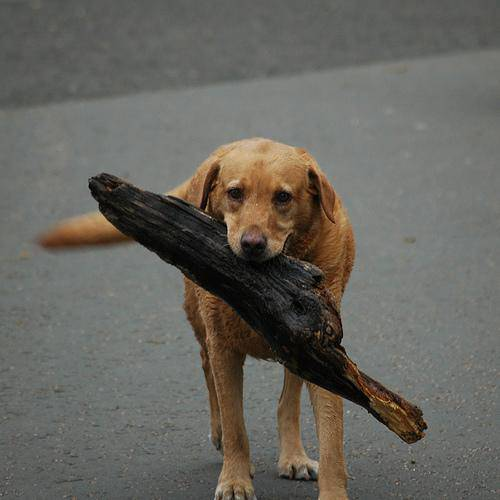

In [ ]:
Image(filenames[4])

In [ ]:
import os 

In [ ]:
len(filenames)

10222

In [ ]:
labels = labels_csv.breed
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal